# Jupyter Notebook  problems in the Essentials of Paleomagnetism Textbook by L. Tauxe

## Problems in Chapter 7

## Problem 1  

From  Chapter  4,  we find an equation for relaxation time ($\tau$) that is:

$$
\tau = { 1\over C} \exp {{ \mu_o H_c M_s v} \over {2 kT}}
$$

so we can solve for $v$ as:

$$
v = { {2kT}\over {\mu_oH_cM_s} } \hbox{ln}(C\tau).
$$
Given that $\mu_oH_c$ = 1 T and looking up the value of $M_s$ for hematite as 0.4 Am$^2$kg$^{-1}$ and the density as 5271 kg m$^{3}$, so volume normalized $M_s$ = 2.1 x 10$^3$ Am$^{-1}$.   We also  need
kT = Boltzmann's constant (1.38 x 10$^{-23}$ J/K) time the absolute temperature ($\sim$ 280 K) =
3.75 x 10$^{-21}$ J, and {ln}$(C\tau)$.    We know that $C=10^{10}$ per second and $\tau$ is given as 100 seconds.  Putting this together, we get $v$ = 1 x 10$^{-22}$ m$^3$.  Assuming that
$v = {4\over 3} \pi r^3$, solving for $r$, then getting the diameter as $2r$ we get $d$ = 57 nm.




In [1]:
import numpy as np
Bc=1.0 # mu_oH_c in tesla
M_hem=.4*5271. # magnetization of hematite
k=1.38e-23 # Boltzmann's constant
T=280 # absolute temperature in kelvin
C=1e10 # frequency factor
tau=100 # relaxation time in seconds
v=((2.*k*T)/(Bc*M_hem))*np.log(C*tau) # equation for volume
r=((3./4.)*v/np.pi)**(1./3.) # equation for radius
print ('d = ', '%i'%(2*r*1e9), ' (nm)') # diameter of particle

d =  57  (nm)


## Problem 2

I want to use the nice 'tabulate' environment, downloaded from https://pypi.python.org/pypi/tabulate/0.7.2
unzip the downloaded file, change directories into it and type the pip install command (once). Then, import the **tabulate** module


In [3]:
#!pip install tabulate
from tabulate import tabulate

The time constant of alignment $\tau$ is given by:

$$
\tau = { {\pi d^3 \eta} \over {m B} } = { {6\eta}\over {M B} }
$$
Choosing the appropriate values for $M$, we get:


In [4]:

M_hem=.4*5271.
M_mag=92.*5197.
def get_TAU(M,B):
    eta=1e-3 # kg/ms
    return (6.*eta)/(M*B)
Bs=[1e-5,5e-5,1e-4]
TAUs=[]
for b in Bs:
    TAUs.append(get_TAU(M_mag,b))
for b in Bs:
    TAUs.append(get_TAU(M_hem,b))
header = [["mineral","M (A/m)","B (uT)", "tau (sec)"]]
print (tabulate(header))
table =[["magnetite",'%3.1e'%(M_mag),Bs[0]*1e6,'%3.1e'%(get_TAU(M_mag,Bs[0]))],
        ["magnetite",'%3.1e'%(M_mag),Bs[1]*1e6,'%3.1e'%(get_TAU(M_mag,Bs[1]))],
        ["magnetite",'%3.1e'%(M_mag),Bs[2]*1e6,'%3.1e'%(get_TAU(M_mag,Bs[2]))],
         ["hematite",'%3.1e'%(M_hem),Bs[0]*1e6,'%3.1e'%(get_TAU(M_hem,Bs[0]))],
         ["hematite",'%3.1e'%(M_hem),Bs[1]*1e6,'%3.1e'%(get_TAU(M_hem,Bs[1]))],
         ["hematite",'%3.1e'%(M_hem),Bs[2]*1e6,'%3.1e'%(get_TAU(M_hem,Bs[2]))]]
print (tabulate(table)) # make a nice table!

-------  -------  ------  ---------
mineral  M (A/m)  B (uT)  tau (sec)
-------  -------  ------  ---------
---------  ------  ---  -------
magnetite  480000   10  0.0013
magnetite  480000   50  0.00025
magnetite  480000  100  0.00013
hematite     2100   10  0.28
hematite     2100   50  0.057
hematite     2100  100  0.028
---------  ------  ---  -------


## Problem 3

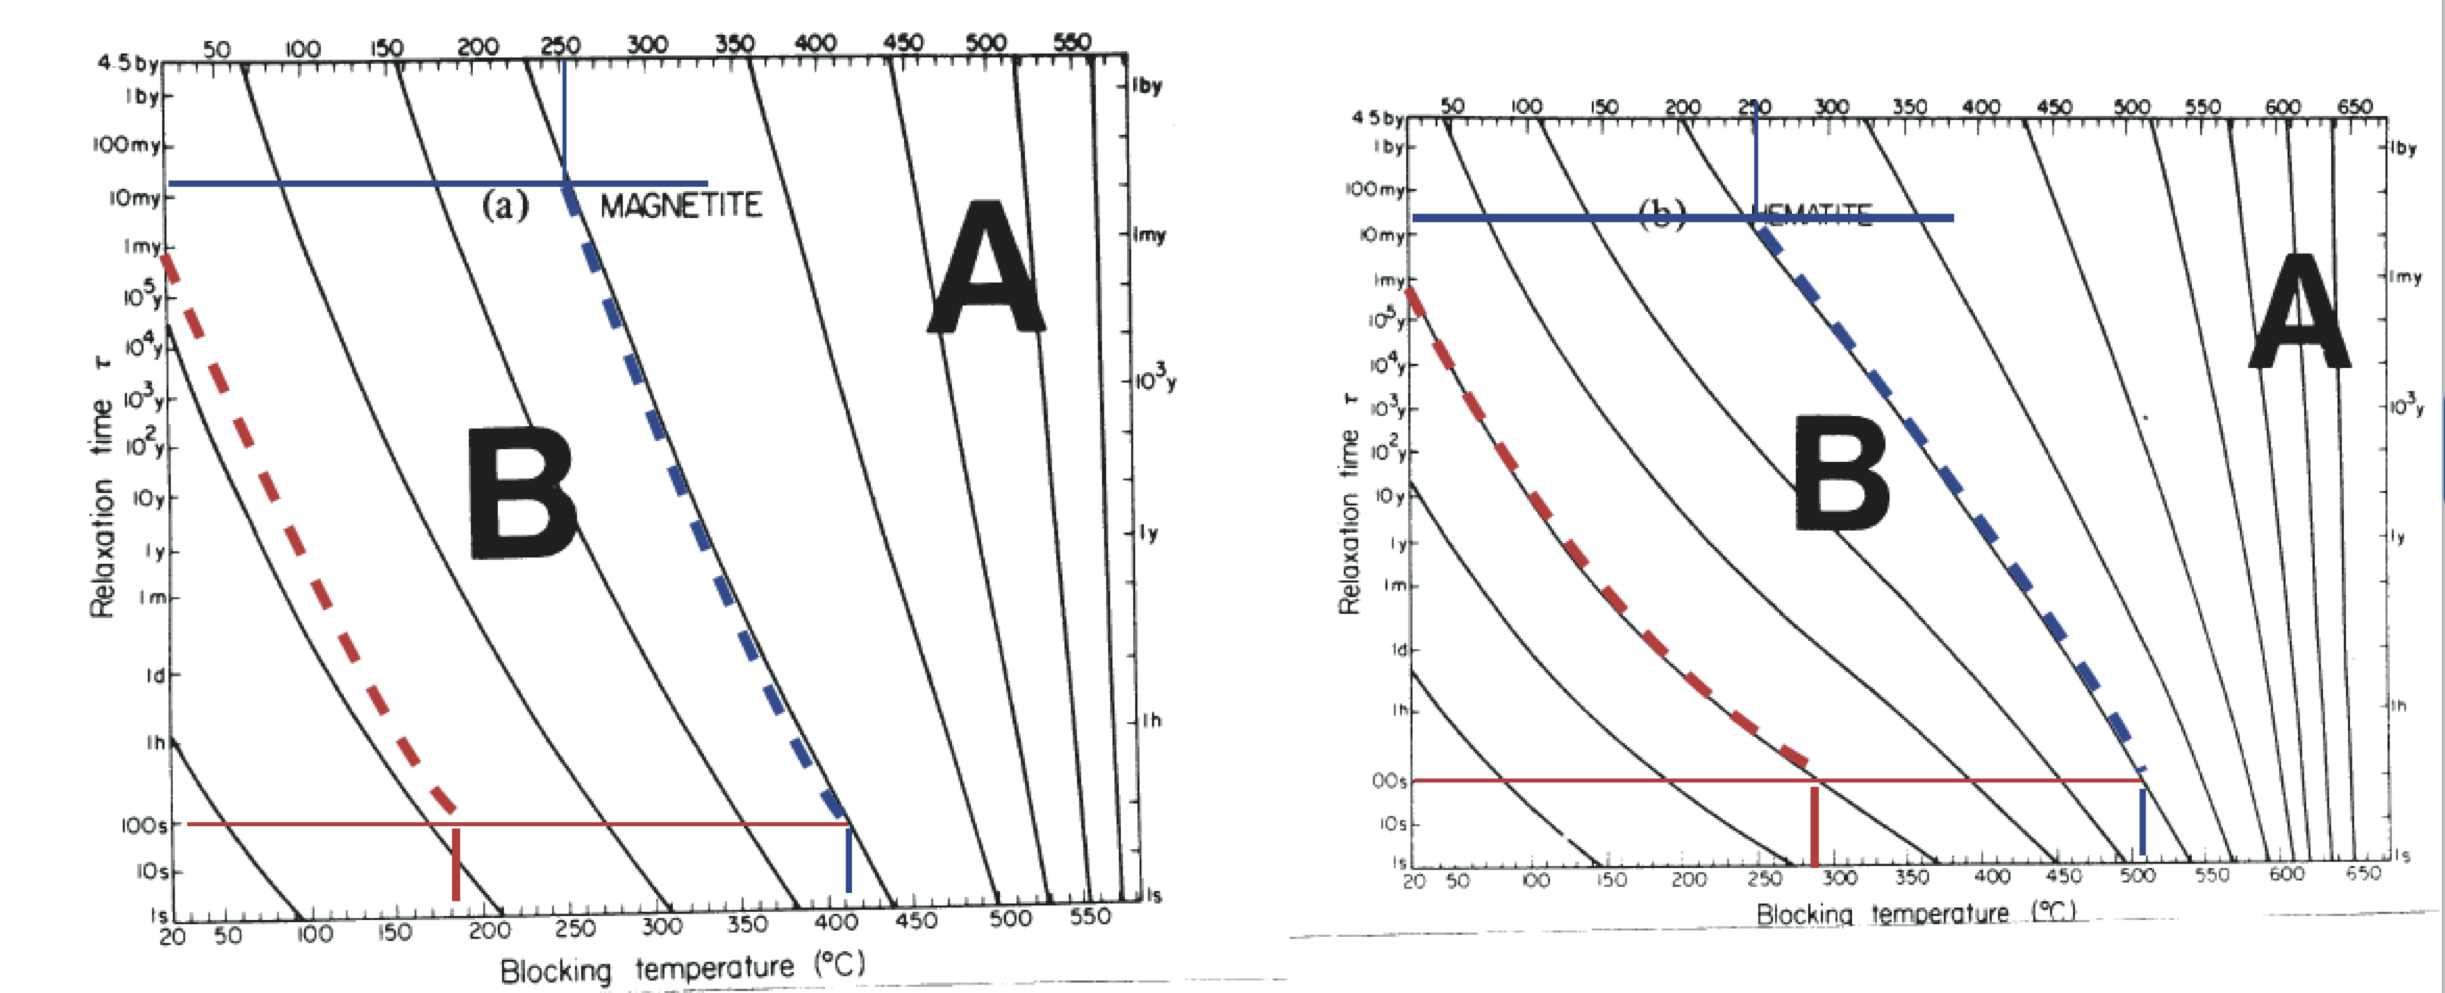

In [22]:
from IPython.display import Image
Image(filename='ps7_prob3.png')

## Problem 4

Here is a bit of code that solves this problem.

In [8]:
 # import the usual suspects.
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

Now write a function to calculate volume from magnetization, coercivity and relaxation time.  

In [9]:
def getvol(Ms,Bc,tau):   #  function for calculating volume
    C=1e10  # frequency factor in per seconds
    k=1.38e-23 # Bolzmann's constant
    T=300.  # room temperature
    vol= np.log(C*tau)*(2*k*T)/(Bc*Ms)  # volume equation
    return vol


And write a function to take a given Ms value and make the plot

In [17]:
def NeelPlot(Ms):
    relax=[100., 3e13,3e16] # relaxation times at  100s,1Myr, 1Gyr  
    colors=['orange','green','blue']
    for tau in relax:  # step through the list of tau values
        Bcs=np.arange(1,101,1) # get an array of coercivities from 10 to 100 mT
        Bcs_T=Bcs*1e-3 # convert to tesla
        Vols=getvol(Ms,Bcs_T,tau)
        plt.plot(Bcs,Vols,color=colors[relax.index(tau)])  # plot this line
    plt.ylabel('Volume (cubic meters)') # define y axis
    plt.xlabel('Coercivity (mT) ') # define x axis
    bounds=plt.axis()   # get current plot limits as a list called bounds
    v=[0,bounds[1],bounds[2],bounds[3]]
    plt.axis(v); # make it so


Draw the Neel  plot for Ms of magnetite (Ms = 4.8e5).

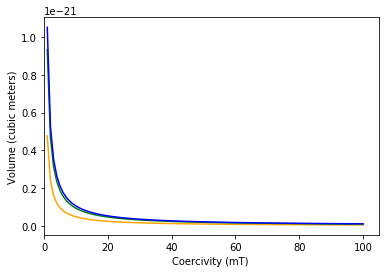

In [18]:
NeelPlot(4.8e5)

And for hematite (Ms = 2e3).

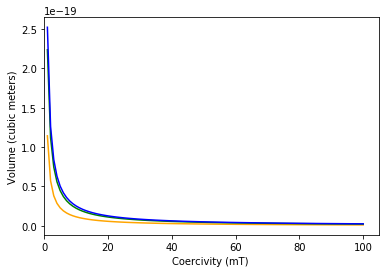

In [19]:
NeelPlot(2e3)